In [21]:
import pandas as pd
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv("pima-indians-diabetes.csv", header=None, names=col_names)

In [22]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


In [23]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] 
y = pima.label 

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [27]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=16)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

df = pd.read_csv("pima-indians-diabetes.csv")
df = df.dropna()

X = df.drop("Outcome", axis=1)  
y = df["Outcome"]

X = X.astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

logreg = LogisticRegression(random_state=16, max_iter=1000)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

c:\Users\shail\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


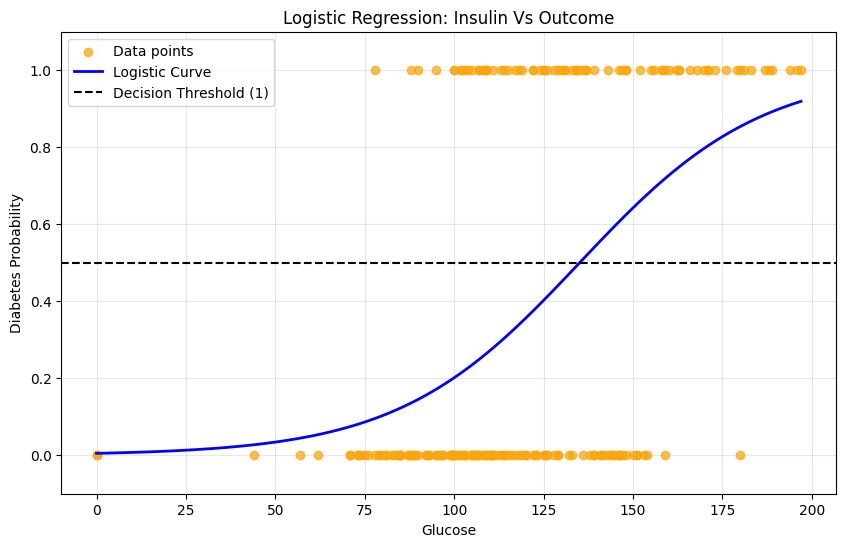

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

limited_df = df.head(200) 
X = limited_df[['Glucose']]
y = limited_df['Outcome']

model = LogisticRegression().fit(X, y)

X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_prob = model.predict_proba(X_range)[:, 1]

plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.7, color='orange', label='Data points')
plt.plot(X_range, y_prob, 'blue', linewidth=2, label='Logistic Curve')
plt.axhline(y=0.5, color='black', linestyle='--', linewidth=1.5, label='Decision Threshold (1)')
plt.xlabel('Glucose')
plt.ylabel('Diabetes Probability')
plt.title('Logistic Regression: Insulin Vs Outcome')
plt.ylim(-0.1, 1.1)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [29]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[120,  31],
       [ 30,  50]])

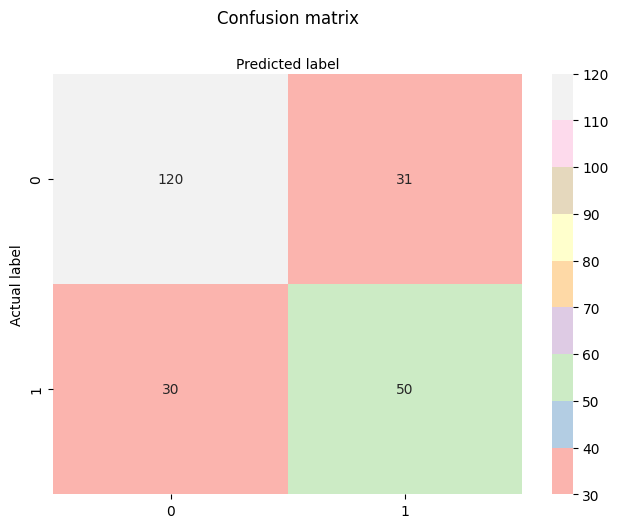

In [48]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

class_names = ['Diabetes', 'No Diabetes']
fig, ax  = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = "Pastel1", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y= 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


plt.Text(0.5,257.44,'Predicted label');

In [37]:
from sklearn.metrics import classification_report
target_names= ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.80      0.79      0.80       151
   with diabetes       0.62      0.62      0.62        80

        accuracy                           0.74       231
       macro avg       0.71      0.71      0.71       231
    weighted avg       0.74      0.74      0.74       231

